Goal: determine the current state of the housing market as compared to the historic state and make predictions on where it is headed. 

Future todos: 
- Automate the data pulls 

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from housing_analysis import Datasets

%load_ext autoreload
%autoreload 2

color_list = list(mcolors.TABLEAU_COLORS.keys())
plt.rcParams["figure.figsize"] = (12, 4)

datasets = Datasets()
recessions = datasets.load_recessions()
display(recessions.tail())

def plot_recessions(df):
    # Adding shaded regions for where the recession is
    for _, row in recessions.iterrows():
        if row['End'] > df['date'].min():
            plt.axvspan(row['Start'], row['End'], color='gray', alpha=0.3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Name,Start,End,Peak unemployment,GDP decline (peak to trough),Characteristics
10,1981–1982 recession,1981-07-01,1982-11-01,0.108,−2.7%,The Iranian Revolution sharply increased the p...
11,Early 1990s recession,1990-07-01,1991-03-01,0.078,−1.4%,After the lengthy peacetime expansion of the 1...
12,Early 2000s recession,2001-03-01,2001-11-01,0.063,−0.3%,The 1990s were the longest period of economic ...
13,Great Recession,2007-12-01,2009-06-01,0.100,−5.1%,The subprime mortgage crisis led to the collap...
14,COVID-19 recession,2020-02-01,2020-04-01,0.147,−19.2%,The economic effects of the pandemic were seve...


- [HOUSEHOLD DEBT AND CREDIT REPORT](https://www.newyorkfed.org/microeconomics/hhdc)

Latest date: 2024-12-01


Latest date: 2024-12-01


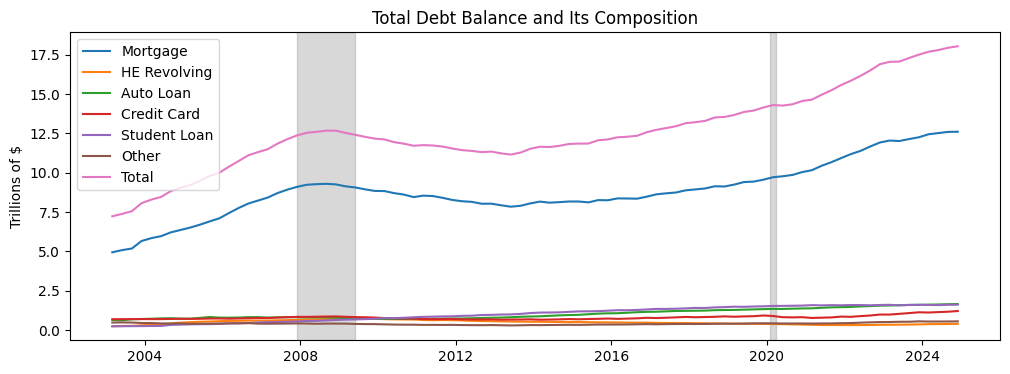

In [76]:
loan_report, title, value_label = datasets.load_loan_report()

latest_date = loan_report.iloc[-1]['date'].strftime('%Y-%m-%d')
print(f"Latest date: {latest_date}")

for i, column in enumerate(loan_report.columns[1:]):
    plt.plot(loan_report['date'], loan_report[column], label=column, color=color_list[i])
    
plot_recessions(loan_report)
plt.title(title)
#plt.xlabel('Date')
plt.ylabel(value_label)
plt.legend()
plt.show()

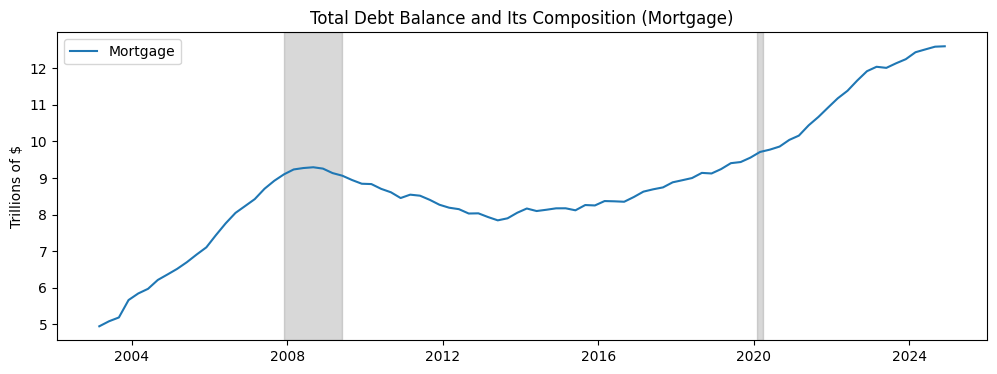

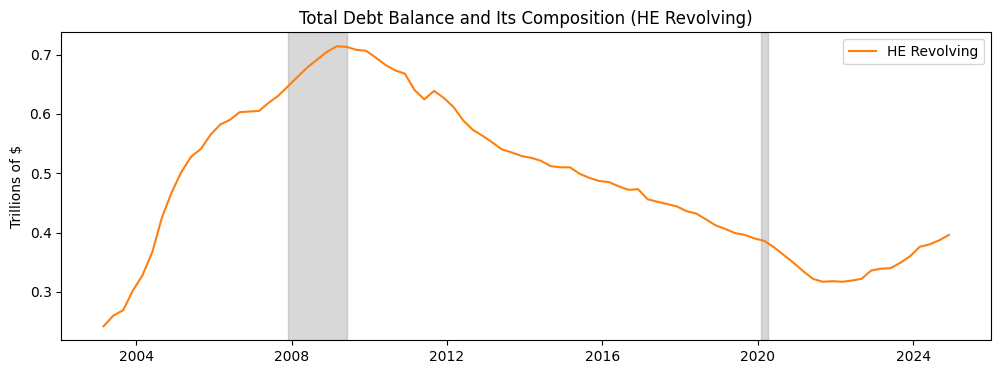

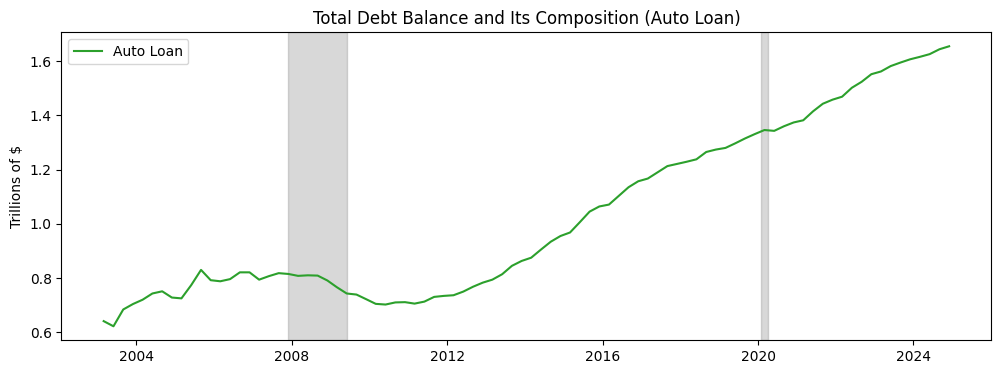

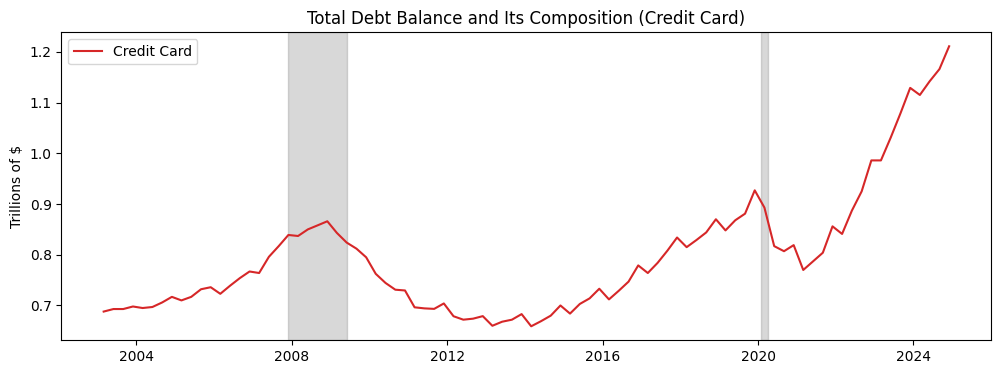

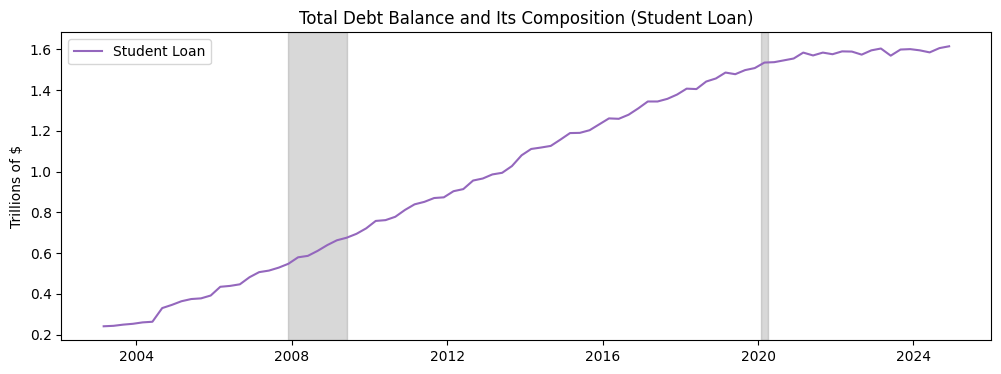

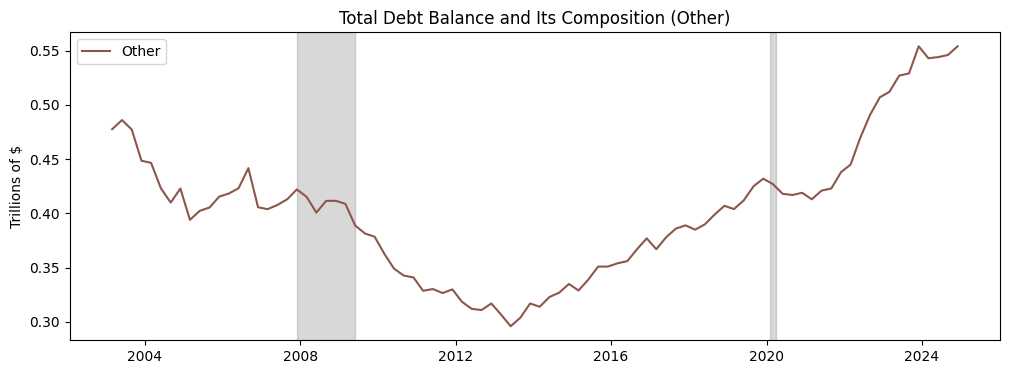

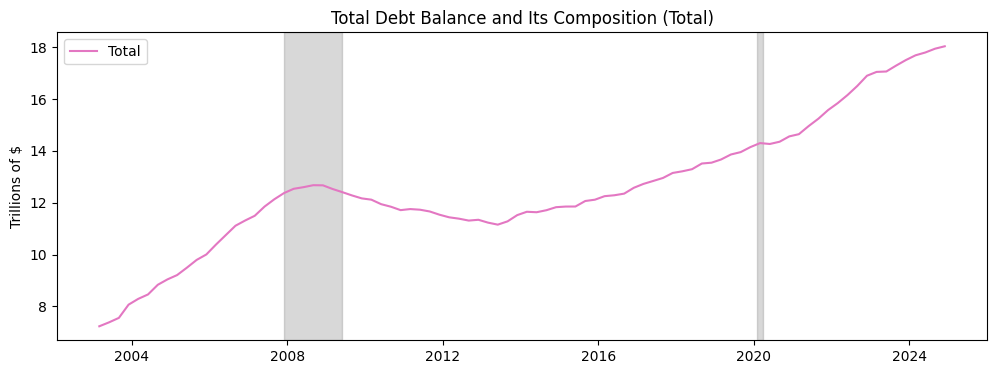

In [38]:
for i, column in enumerate(loan_report.columns[1:]):
    plt.plot(loan_report['date'], loan_report[column], label=column, color=color_list[i])
    plot_recessions(loan_report)
    plt.title(title + f' ({column})')
    #plt.xlabel('Date')
    plt.ylabel(value_label)
    plt.legend()
    plt.show()

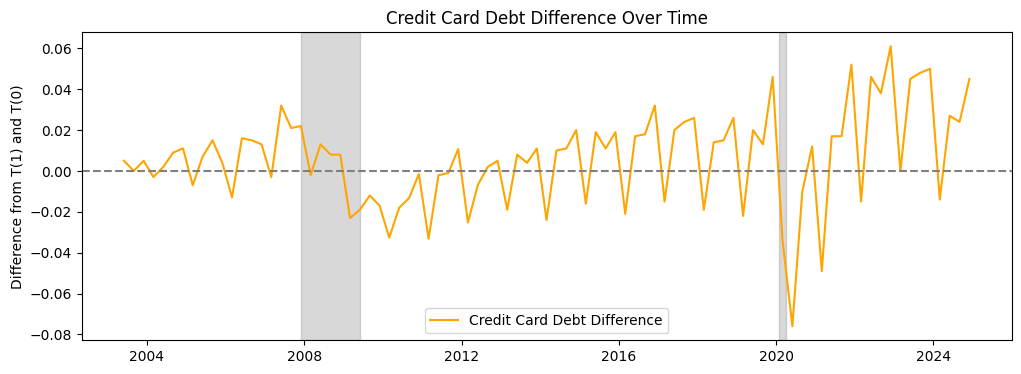

In [39]:
plt.plot(loan_report['date'], loan_report['Credit Card'].diff(), color='orange', label='Credit Card Debt Difference')
plot_recessions(loan_report)
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Credit Card Debt Difference Over Time')
#plt.xlabel('Date')
plt.ylabel('Difference from T(1) and T(0)')
plt.legend()
plt.show()

Latest date: 2024-12-01


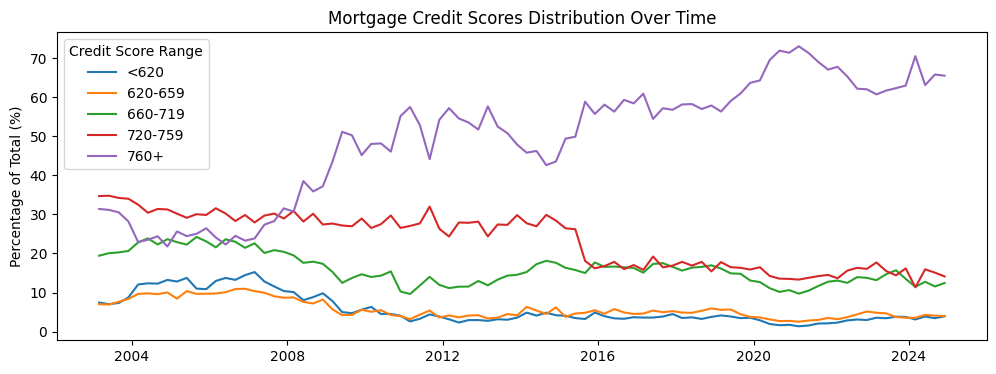

In [77]:
mortgage_credit_scores, title, value_label  = datasets.load_mortgage_credit_scores()

latest_date = mortgage_credit_scores.iloc[-1]['date'].strftime('%Y-%m-%d')
print(f"Latest date: {latest_date}")

# Convert each credit score bin to a percentage of the total
for column in mortgage_credit_scores.columns[1:-1]:  # Excluding date and TOTAL columns
    mortgage_credit_scores[column + ' (%)'] = (mortgage_credit_scores[column] / mortgage_credit_scores['TOTAL']) * 100
    
for i, column in enumerate(['<620', '620-659', '660-719', '720-759', '760+']):
    plt.plot(mortgage_credit_scores['date'], mortgage_credit_scores[column + ' (%)'], label=column, color=color_list[i])

plt.title('Mortgage Credit Scores Distribution Over Time')
#plt.xlabel('Date')
plt.ylabel('Percentage of Total (%)')
plt.legend(title='Credit Score Range')
plt.show()

Latest date: 2024-12-01


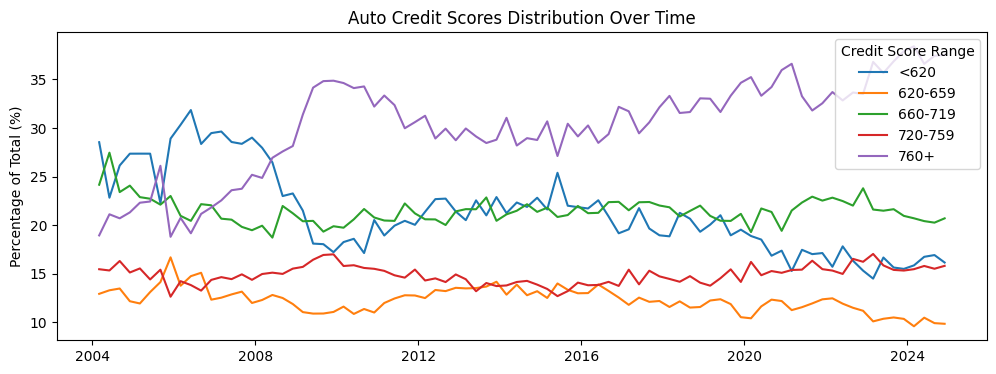

In [78]:
auto_credit_scores, title, value_label  = datasets.load_auto_credit_scores()

latest_date = auto_credit_scores.iloc[-1]['date'].strftime('%Y-%m-%d')
print(f"Latest date: {latest_date}")

# Convert each credit score bin to a percentage of the total
for column in auto_credit_scores.columns[1:-1]:  # Excluding date and TOTAL columns
    auto_credit_scores[column + ' (%)'] = (auto_credit_scores[column] / auto_credit_scores['TOTAL']) * 100
    
auto_credit_scores.head()

for i, column in enumerate(['<620', '620-659', '660-719', '720-759', '760+']):
    plt.plot(auto_credit_scores['date'], auto_credit_scores[column + ' (%)'], label=column, color=color_list[i])

plt.title('Auto Credit Scores Distribution Over Time')
#plt.xlabel('Date')
plt.ylabel('Percentage of Total (%)')
plt.legend(title='Credit Score Range')
plt.show()

Side note: I see the fed is calculating credit score based on the Equifax Riskscore 3.0. I did some digging into this model and found that it's not very transparent, but interestingly, they have switched from logistic regression models to neural networks. 

They are also using telco data. It's not clear what telco data is used, but I found a paper where they used data such as call and SMS metadata, including identifiers for the other party, timestamps, tower locations, and call durations. So they get behavioral indicators like call and SMS frequency, periodicity, duration, and social network characteristics.

- [Equifax Risk Score 3](https://assets.equifax.com/assets/canada/english/equifax_risk_score_3.0_product_sheet_en.pdf)
- [Behavior Revealed in Mobile Phone Usage Predicts Credit Repayment](https://arxiv.org/pdf/1712.05840)

Latest date: 2024-12-01


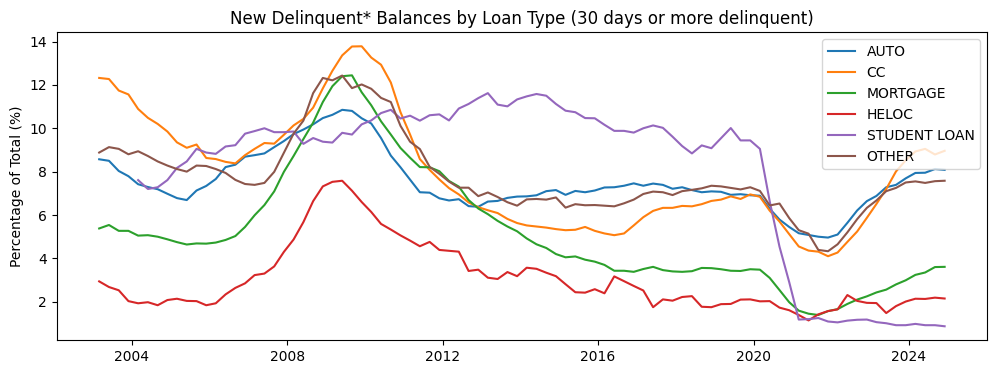

In [79]:
delinquent, title, value_label = datasets.load_delinquent_loans()

latest_date = delinquent.iloc[-1]['date'].strftime('%Y-%m-%d')
print(f"Latest date: {latest_date}")

for column in delinquent.columns[1:-1]:  # Excluding date and TOTAL columns
    plt.plot(delinquent['date'], delinquent[column], label=column)

plt.title('New Delinquent* Balances by Loan Type (30 days or more delinquent)')
#plt.xlabel('Date')
plt.ylabel('Percentage of Total (%)')
plt.legend()
plt.show()

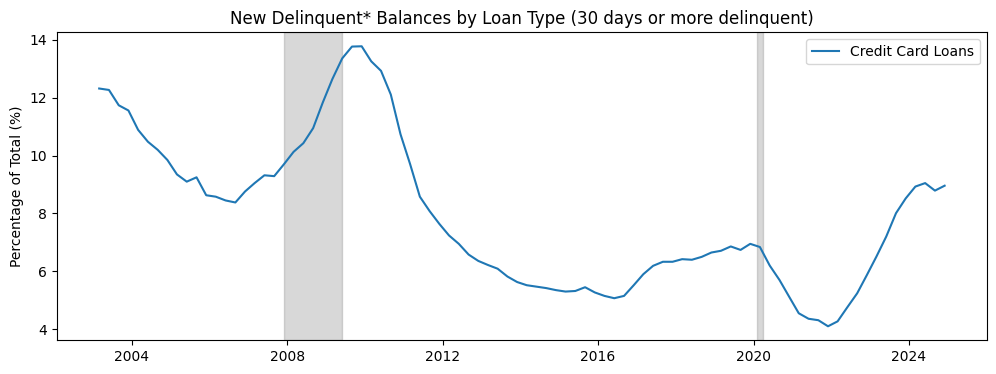

In [43]:
plt.plot(delinquent['date'], delinquent['CC'], label='Credit Card Loans')
plot_recessions(delinquent)
plt.title('New Delinquent* Balances by Loan Type (30 days or more delinquent)')
#plt.xlabel('Date')
plt.ylabel('Percentage of Total (%)')
plt.legend()
plt.show()

[COVID-19 Emergency Relief and Federal Student Aid](https://studentaid.gov/announcements-events/covid-19)

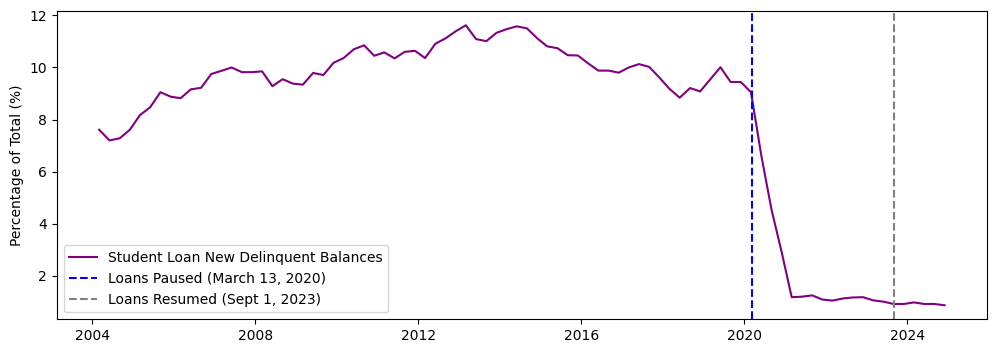

In [44]:
plt.plot(delinquent['date'], delinquent['STUDENT LOAN'], label='Student Loan New Delinquent Balances', color='purple')
plt.axvline(pd.to_datetime('2020-03-13'), color='blue', linestyle='--', label='Loans Paused (March 13, 2020)')
plt.axvline(pd.to_datetime('2023-09-01'), color='gray', linestyle='--', label='Loans Resumed (Sept 1, 2023)')
#plt.xlabel('Date')
plt.ylabel('Percentage of Total (%)')
plt.legend()
plt.show()

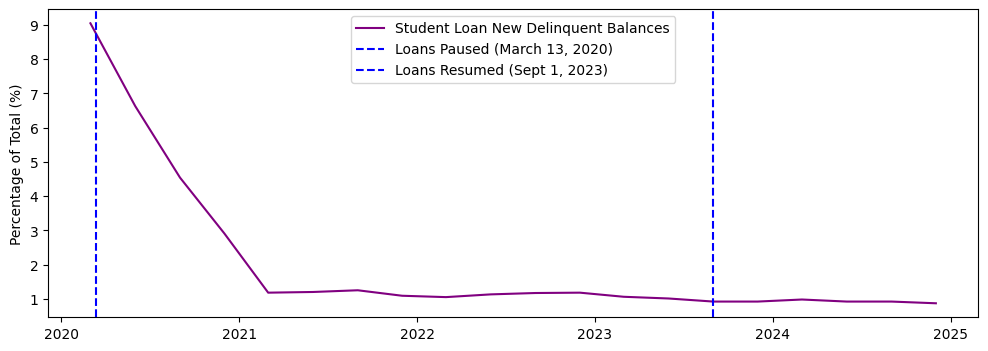

In [45]:
recent_delinquent = delinquent[delinquent['date'] >= '2020-01-01']

plt.plot(recent_delinquent['date'], recent_delinquent['STUDENT LOAN'], label='Student Loan New Delinquent Balances', color='purple')
plt.axvline(pd.to_datetime('2020-03-13'), color='blue', linestyle='--', label='Loans Paused (March 13, 2020)')
plt.axvline(pd.to_datetime('2023-09-01'), color='blue', linestyle='--', label='Loans Resumed (Sept 1, 2023)')
#plt.xlabel('Date')
plt.ylabel('Percentage of Total (%)')
plt.legend()
plt.show()

Foreclosure is when a lender takes possession of a mortgaged property due to non-payment.

Bankruptcy is where an individual or business seeks relief from debts they cannot pay.

2005 Q4 had a massive spike in bankruptcies. The Bankruptcy Abuse Prevention and Consumer Protection Act, while intended to curb perceived abuse of the bankruptcy system, ultimately had unintended consequences that worsened financial distress for many households. Many debtors rushed to file for bankruptcy before the new, more restrictive law took effect.

Latest date: 2024-12-01


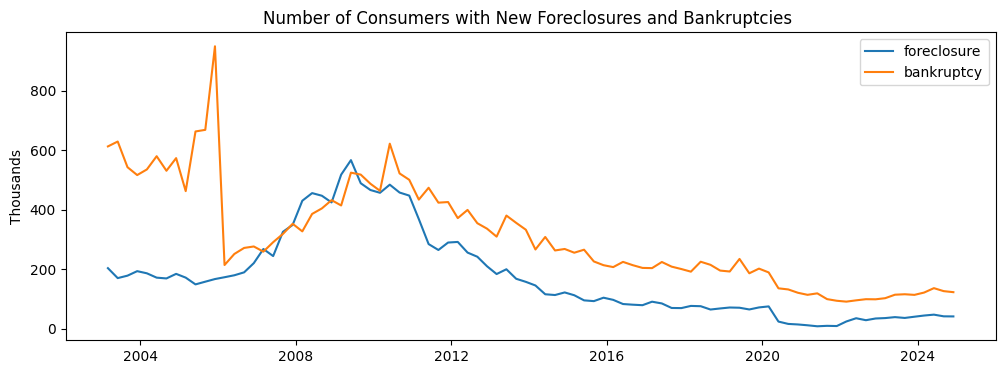

In [80]:
# foreclosures = pd.read_excel('data/newyorkfed_household_debit_and_credit_report.xlsx', sheet_name='Page 17 Data', header=3)
foreclosures, title, value_label = datasets.load_foreclosures()

latest_date = foreclosures.iloc[-1]['date'].strftime('%Y-%m-%d')
print(f"Latest date: {latest_date}")

plt.plot(foreclosures['date'], foreclosures['foreclosure'], label='foreclosure')
plt.plot(foreclosures['date'], foreclosures['bankruptcy'], label='bankruptcy')
plt.title(title)
plt.ylabel(value_label)
plt.legend()
plt.show()

## Census.gov: Housing Vacancies and Homeownership (CPS/HVS)
https://www.census.gov/housing/hvs/data/prevann.html

[DEFINITIONS AND EXPLANATIONS](https://www.census.gov/housing/hvs/files/annual23/ann23def.pdf)


[Number of owner-occupied housing units in the United States](https://www.statista.com/statistics/187576/housing-units-occupied-by-owner-in-the-us-since-1975/)
Owner-occupied units has been climbing since 2015. It's now at 86% as of 2023 as compared to 75% in 2015.

The rental vacancy rate decreased 12.07% while the homeowner vacancy remained at 0.8% 

In [ ]:
t2_vacancy_rates = pd.read_excel('../data/census_t2_Rental_and_Homeowner_Vacancy_Rates_by_Selected_Characteristics.xlsx', 
                                 sheet_name='A', 
                                 header=7)

rental_vacancy_2022 = t2_vacancy_rates.iloc[4, 1]
rental_vacancy_2023 = t2_vacancy_rates.iloc[4, 3]
print(f"rental_vacancy_2022: {rental_vacancy_2022}%")
print(f"rental_vacancy_2023: {rental_vacancy_2023}%")
print(f"Percentage change: {100 * (rental_vacancy_2023 - rental_vacancy_2022) / rental_vacancy_2022:.02f}%")


rental_vacancy_2022: 5.8%
rental_vacancy_2023: 6.5%
Percentage change: 12.07%


### Rental Vacancy Rates (2022 -> 2023)

In [48]:
rent_vacancy_by_cost = t2_vacancy_rates.iloc[34:44, 0].reset_index() #drop=True
# monthly_rent_costs['Characteristics'] = monthly_rent_costs['Characteristics'].str.replace('.', '', regex=False)
rent_vacancy_by_cost['Characteristics'] = rent_vacancy_by_cost['Characteristics'].str.replace(r'[\.…]', '', regex=True)
rent_vacancy_by_cost['Percentage Change'] = (100 * (t2_vacancy_rates.iloc[34:44, 3] - t2_vacancy_rates.iloc[34:44, 1]) / t2_vacancy_rates.iloc[34:44, 3]).reset_index()[0]
rent_vacancy_by_cost['Percentage Change'] = rent_vacancy_by_cost['Percentage Change'].astype(float).round(2)
rent_vacancy_by_cost.drop(columns='index')

,Characteristics,Percentage Change
0,Less than $500,-20.00
1,$500 to $599,-2.17
2,$600 to $699,4.76
3,$700 to $799,-13.56
4,$800 to $899,0.00
5,$900 to $999,24.53
6,$1000 to $1249,12.28
7,$1250 to $1499,3.28
8,$1500 to $1749,27.54
9,$1750 to $1999,5.71


### Homeowner Vacancy Rate (2022 -> 2023)

In [49]:
housing_vacancy_by_cost = t2_vacancy_rates.iloc[90:100, 0].reset_index() #drop=True
housing_vacancy_by_cost['Characteristics'] = housing_vacancy_by_cost['Characteristics'].str.replace(r'[\.…]', '', regex=True)
housing_vacancy_by_cost['Percentage Change'] = (100 * (t2_vacancy_rates.iloc[90:100, 3].to_numpy() - t2_vacancy_rates.iloc[90:100, 1].to_numpy()) / t2_vacancy_rates.iloc[90:100, 3].to_numpy())
housing_vacancy_by_cost['Percentage Change'] = housing_vacancy_by_cost['Percentage Change'].astype(float).round(2)
housing_vacancy_by_cost.drop(columns='index')

,Characteristics,Percentage Change
0,All specified owner units,0.00
1,"Less than $100,000",-12.50
2,"$100,000 to $199,999",-16.67
3,"$200,000 to $249,999",-40.00
4,"$250,000 to $299,999",-16.67
5,"$300,000 to $349,999",25.00
6,"$350,000 to $399,999",16.67
7,"$400,000 to $499,999",16.67
8,"$500,000 to $599,999",16.67
9,"$600,000 or more",0.00


Northeast: Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, Vermont, New Jersey, New York, Pennsylvania.

Midwest: Illinois, Indiana, Michigan, Ohio, Wisconsin, Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, South Dakota.

South: Delaware, District of Columbia, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, West Virginia, Alabama, Kentucky, Mississippi, Tennessee, Arkansas, Louisiana, Oklahoma, Texas.

West: Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, Wyoming, Alaska, California, Hawaii, Oregon, Washington.

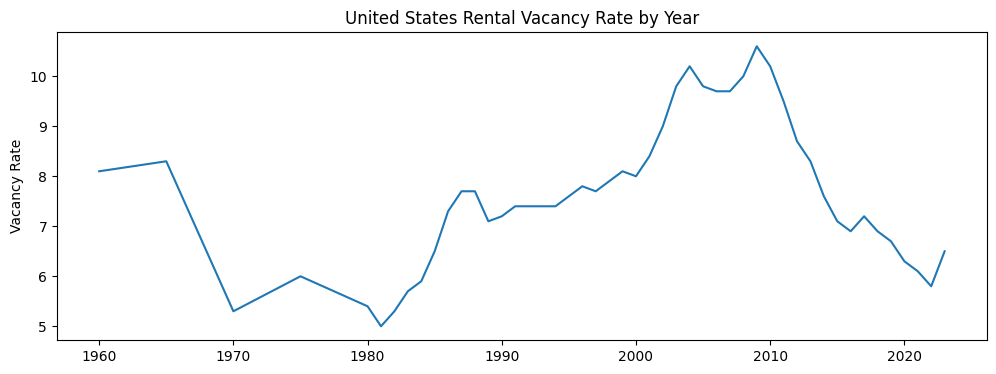

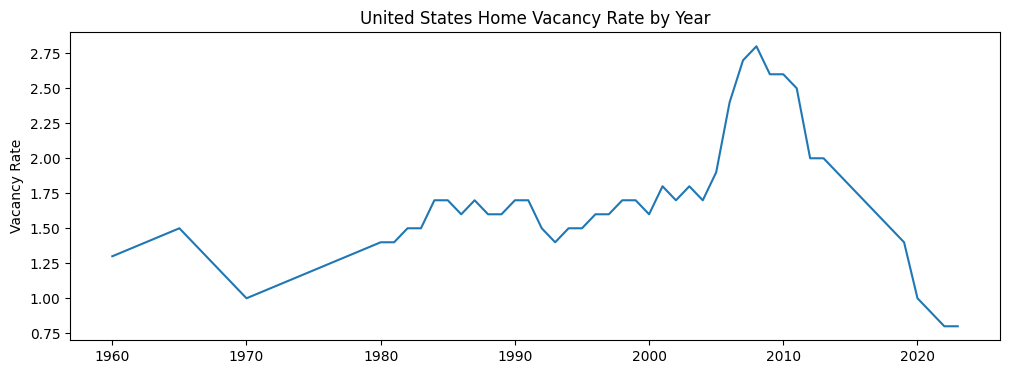

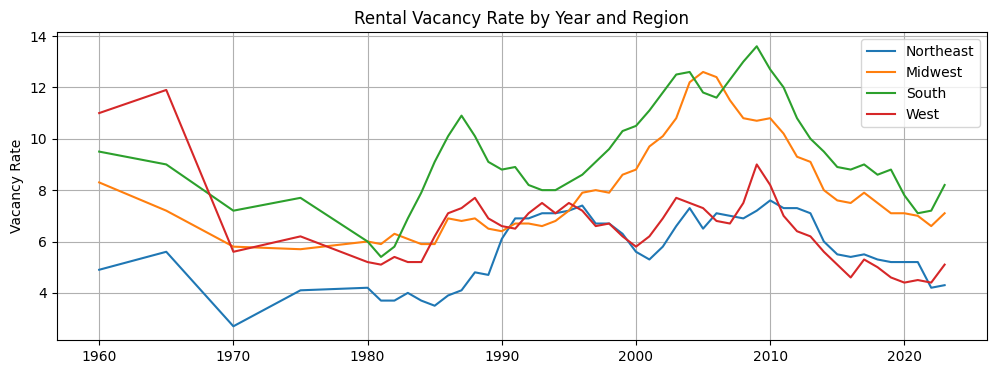

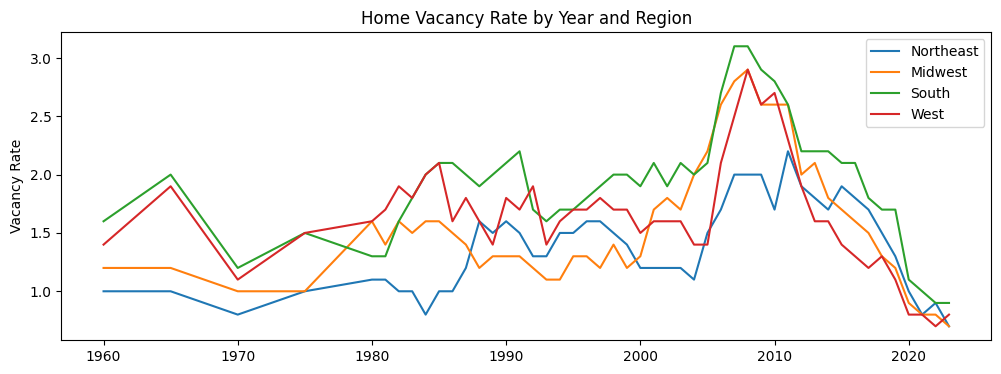

In [50]:
t1_vacancy_rates = pd.read_excel('../data/census_t1_Rental_and_Homeowner_Vacancy_Rates_by_Area.xlsx', 
                                 sheet_name='A', 
                                 header=1)
t1_vacancy_rates['Year'] = t1_vacancy_rates['Year'].str.replace(r'[\.…]', '', regex=True)

# Split into rental and home dataframes
t1_vacancy_rates_rentals = t1_vacancy_rates.iloc[:12].copy()
t1_vacancy_rates_homes = t1_vacancy_rates.iloc[14:].copy()
t1_vacancy_rates_homes = t1_vacancy_rates_homes.set_index('Year').T.reset_index()
t1_vacancy_rates_rentals = t1_vacancy_rates_rentals.set_index('Year').T.reset_index()


plt.plot(t1_vacancy_rates_rentals['index'], t1_vacancy_rates_rentals['United States'], linestyle='-')
plt.title('United States Rental Vacancy Rate by Year')
#plt.xlabel('Date')
plt.ylabel('Vacancy Rate')
# plt.grid(True)
plt.show()

plt.plot(t1_vacancy_rates_homes['index'], t1_vacancy_rates_homes['United States'], linestyle='-')
plt.title('United States Home Vacancy Rate by Year')
#plt.xlabel('Date')
plt.ylabel('Vacancy Rate')
# plt.grid(True)
plt.show()

for i, region in enumerate(['Northeast', 'Midwest', 'South', 'West']):
    plt.plot(t1_vacancy_rates_rentals['index'], t1_vacancy_rates_rentals[region], label=f'{region}', color=color_list[i])

plt.title('Rental Vacancy Rate by Year and Region')
#plt.xlabel('Date')
plt.ylabel('Vacancy Rate')
plt.grid(True)
plt.legend()
plt.show()


for i, region in enumerate(['Northeast', 'Midwest', 'South', 'West']):
    plt.plot(t1_vacancy_rates_homes['index'], t1_vacancy_rates_homes[region], label=f'{region}', color=color_list[i])

plt.title('Home Vacancy Rate by Year and Region')
#plt.xlabel('Date')
plt.ylabel('Vacancy Rate')
# plt.grid(True)
plt.legend()
plt.show()

### 10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity (T10Y3M)	


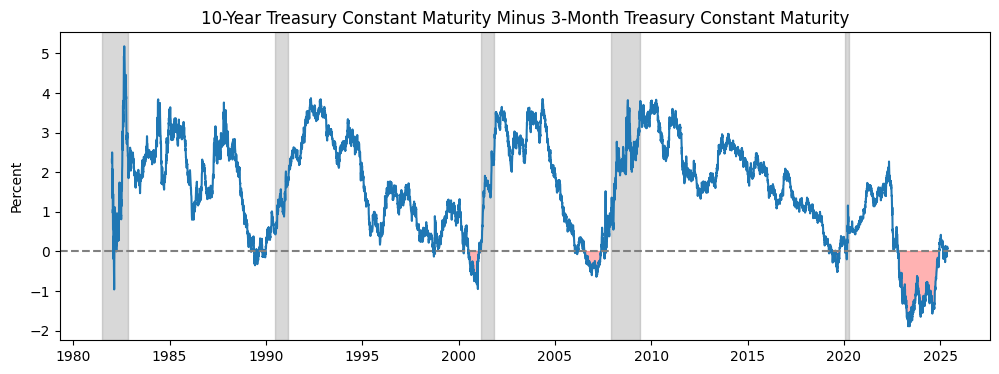

In [51]:
treasury_spread = datasets.load_treasury_spread()
# treasury_spread['value'] = treasury_spread['value'].astype(float)
treasury_spread['value'] = pd.to_numeric(treasury_spread['value'], errors='coerce')
treasury_spread.dropna(subset=['value'], inplace=True)
treasury_spread = treasury_spread.set_index('date')
treasury_spread.resample('W-MON').mean()
plt.plot(treasury_spread)
plot_recessions(treasury_spread.reset_index())
plt.axhline(y=0, color='gray', linestyle='--')
plt.fill_between(treasury_spread.index, treasury_spread['value'], 0, where=treasury_spread['value'] < 0, 
                 color='red', alpha=0.3)
plt.title('10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity')
plt.ylabel('Percent')
plt.show()

### Probability of US Recession Predicted by Treasury Spread

https://www.newyorkfed.org/medialibrary/media/research/capital_markets/Prob_Rec.pdf

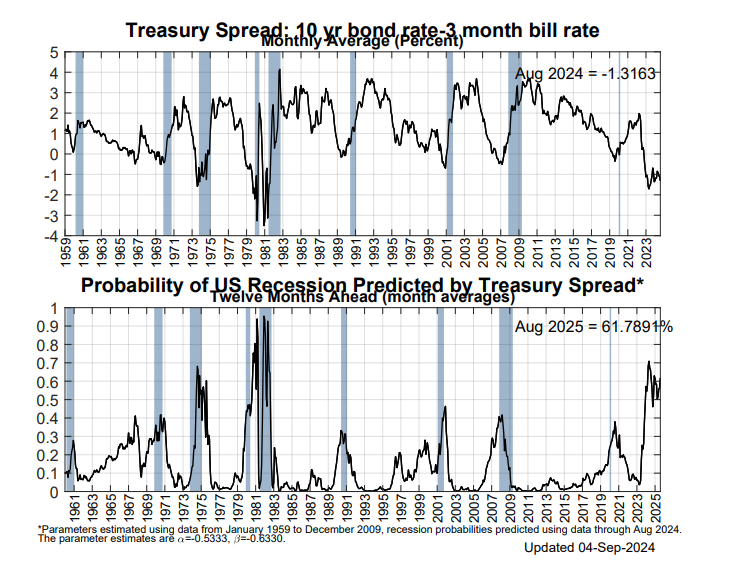

###  30-Year Fixed Rate Mortgage Average in the United States (MORTGAGE30US)	
https://fred.stlouisfed.org/series/MORTGAGE30US

Latest date: 2025-05-15


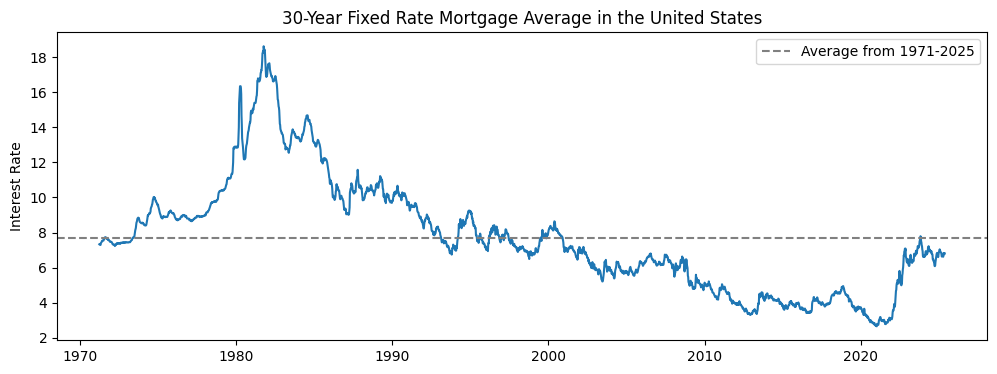

In [84]:
avg_mortgage_rates = datasets.load_avg_mortgage_rates()

latest_date = avg_mortgage_rates.iloc[-1]['date'].strftime('%Y-%m-%d')
print(f"Latest date: {latest_date}")

plt.plot(avg_mortgage_rates.date, avg_mortgage_rates.value)
plt.axhline(y=avg_mortgage_rates.value.mean(), color='gray', linestyle='--', label=f'Average from {avg_mortgage_rates.date.min().year}-{avg_mortgage_rates.date.max().year}')
plt.title('30-Year Fixed Rate Mortgage Average in the United States')
plt.ylabel('Interest Rate')
plt.legend()
plt.show()

###  Real Median Household Income in the United States (MEHOINUSA672N)	
https://fred.stlouisfed.org/series/MEHOINUSA672N

Latest date: 2023-01-01


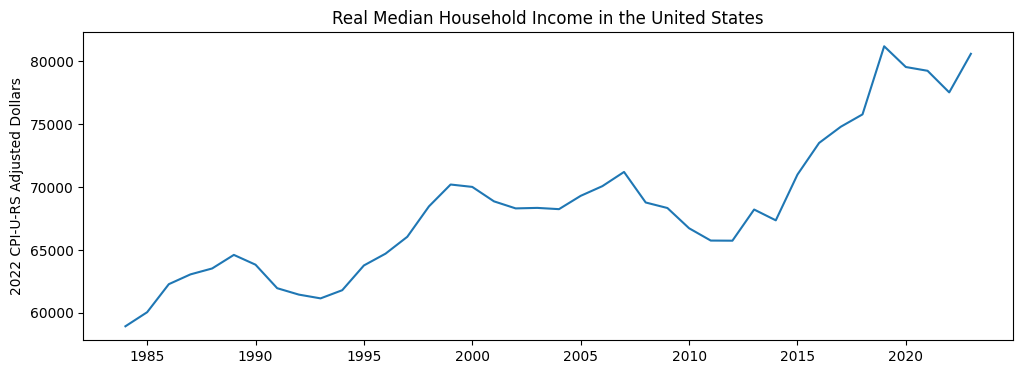

In [85]:
median_household_income = datasets.load_median_household_income()

latest_date = median_household_income.iloc[-1]['date'].strftime('%Y-%m-%d')
print(f"Latest date: {latest_date}")

plt.plot(median_household_income.date, median_household_income.value)
plt.title('Real Median Household Income in the United States')
plt.ylabel('2022 CPI-U-RS Adjusted Dollars')
plt.show()

[2024 Home Buyers and Sellers Generational Trends Report](https://www.nar.realtor/sites/default/files/documents/2024-home-buyers-and-sellers-generational-trends-04-03-2024.pdf) by the National Association of REALTORS® Research Group

- Median income (2022) of homebuyers was $107k
- Median downpayment percent was 15%
- 23% have student loan debt, median is $30k
- 44% of home buyers think it is as good of an investment as stocks 


###  Unemployment Rate (UNRATE)	
https://fred.stlouisfed.org/series/UNRATE

Latest date: 2025-04-01


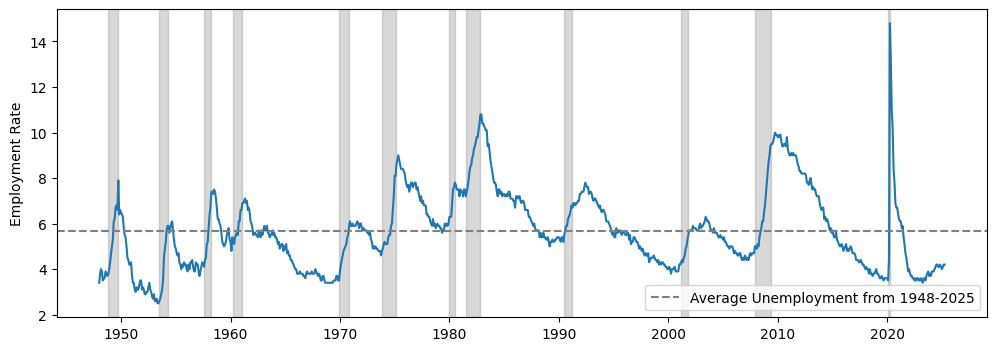

In [86]:
unemployment_rate = datasets.load_unemployment_rate()

latest_date = unemployment_rate.iloc[-1]['date'].strftime('%Y-%m-%d')
print(f"Latest date: {latest_date}")

plt.plot(unemployment_rate.date, unemployment_rate.value)
plot_recessions(unemployment_rate)

plt.axhline(y=unemployment_rate.value.mean(), 
            color='gray', 
            linestyle='--', 
            label=f'Average Unemployment from {unemployment_rate.date.min().year}-{unemployment_rate.date.max().year}')

# plt.title('')
#plt.xlabel('Date')
plt.ylabel('Employment Rate')
plt.legend()
plt.show()

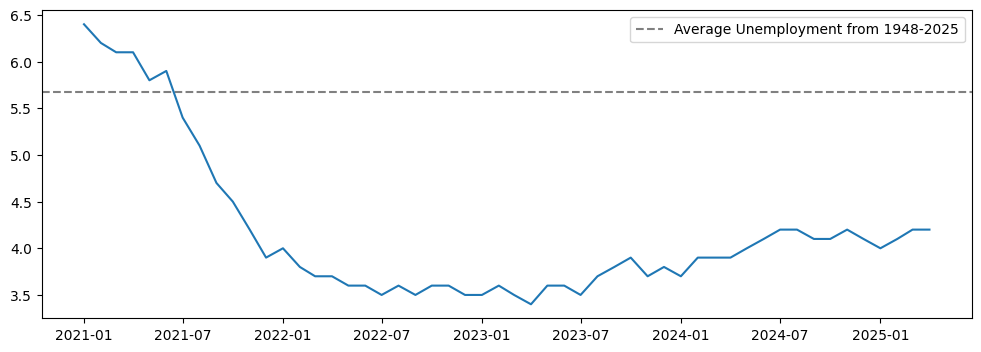

In [55]:
unemployment_rate_2021 = unemployment_rate[unemployment_rate.date >= '2021-01-01']
plt.axhline(y=unemployment_rate.value.mean(), 
            color='gray', 
            linestyle='--', 
            label=f'Average Unemployment from {unemployment_rate.date.min().year}-{unemployment_rate.date.max().year}')

plt.plot(unemployment_rate_2021.date, unemployment_rate_2021.value)
plt.legend()

### Median Sales Price of Houses Sold for the United States (MSPUS)	
https://fred.stlouisfed.org/series/MSPUS

Latest date: 2025-01-01


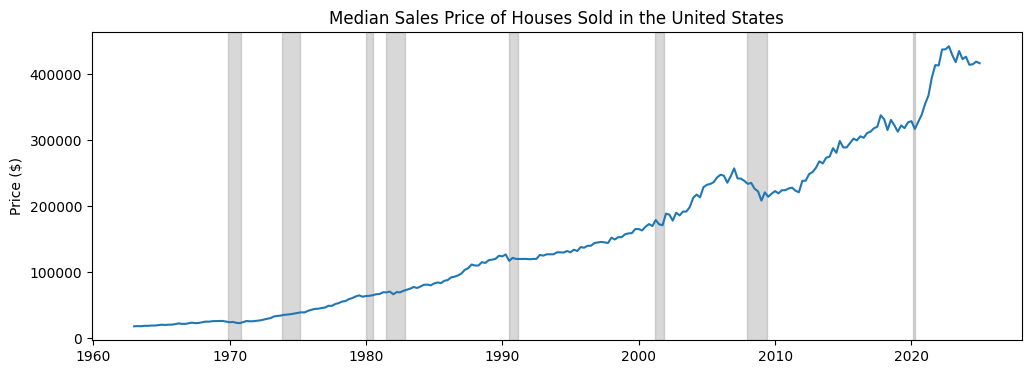

In [87]:
median_house_price = datasets.load_median_house_price()

latest_date = median_house_price.iloc[-1]['date'].strftime('%Y-%m-%d')
print(f"Latest date: {latest_date}")

plt.plot(median_house_price.date, median_house_price.value)
plt.title('Median Sales Price of Houses Sold in the United States')
plt.ylabel('Price ($)')
plot_recessions(median_house_price)

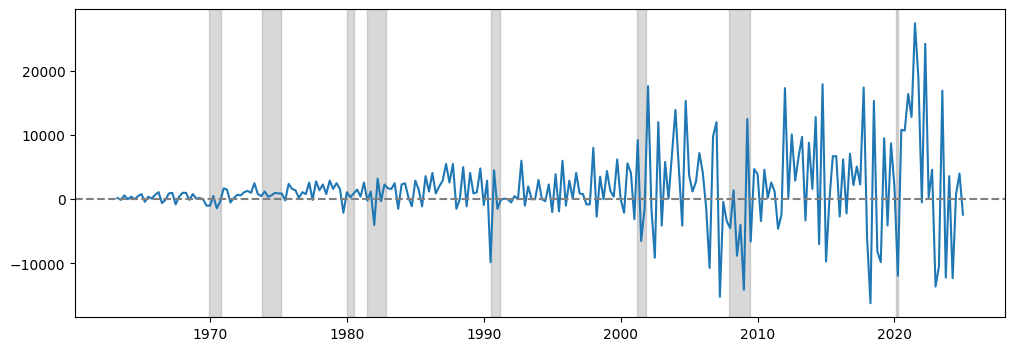

In [57]:
plt.plot(median_house_price.date, median_house_price.value.diff())
plot_recessions(median_house_price)
plt.axhline(y=0, color='gray', linestyle='--')

### 28% / 36% Rule
No more than 28% of the borrower’s gross monthly income should be spent on housing costs. 

Housing costs typically include:
- Mortgage principal and interest
- Property taxes
- Homeowners insurance

No more than 36% spent on total debt costs. This includes housing plus other debts like car loans, credit card payments, student loans, and any other monthly debt obligations.

In [58]:
def calculate_mortgage_payment(home_price, down_payment_percent, loan_term_years, annual_interest_rate):
    # Convert down payment percentage to a decimal and calculate loan amount
    down_payment = home_price * (down_payment_percent / 100)
    loan_amount = home_price - down_payment
    
    # Convert annual interest rate to monthly and loan term to number of months
    monthly_interest_rate = annual_interest_rate / 100 / 12
    total_payments = loan_term_years * 12
    
    # Calculate the monthly payment using the amortization formula
    if monthly_interest_rate > 0:
        monthly_payment = loan_amount * monthly_interest_rate * (1 + monthly_interest_rate)**total_payments / \
                          ((1 + monthly_interest_rate)**total_payments - 1)
    else:
        # If interest rate is 0%, just divide the loan amount by the total number of months
        monthly_payment = loan_amount / total_payments

    return monthly_payment


home_price = median_house_price.iloc[-1].value
down_payment_percent = 15
loan_term_years = 30
annual_interest_rate = 6  # TODO



monthly_payment = calculate_mortgage_payment(home_price, down_payment_percent, loan_term_years, annual_interest_rate)
current_monthly_percentage = 100*monthly_payment / (median_household_income.iloc[-1].value / 12)
print(f'Monthly income ({median_household_income.iloc[-1].date.year}): ${median_household_income.iloc[-1].value / 12:.0f}')
print(f'Median House Price ({median_house_price.iloc[-1].date.year}): ${median_house_price.iloc[-1].value:.0f}')
print(f"Monthly Mortgage Payment: ${monthly_payment:.0f}")
print(f"Monthly Mortgage Payment as a % of Salary: {current_monthly_percentage:.02f}%")


Monthly income (2023): $6718
Median House Price (2025): $416900
Monthly Mortgage Payment: $2125
Monthly Mortgage Payment as a % of Salary: 31.63%


Combining mortgage interest rates with median household income and median house prices to find the % of income required to pay for a mortgage. 

Assumes:
- 15% down payment 
- 30 year loan

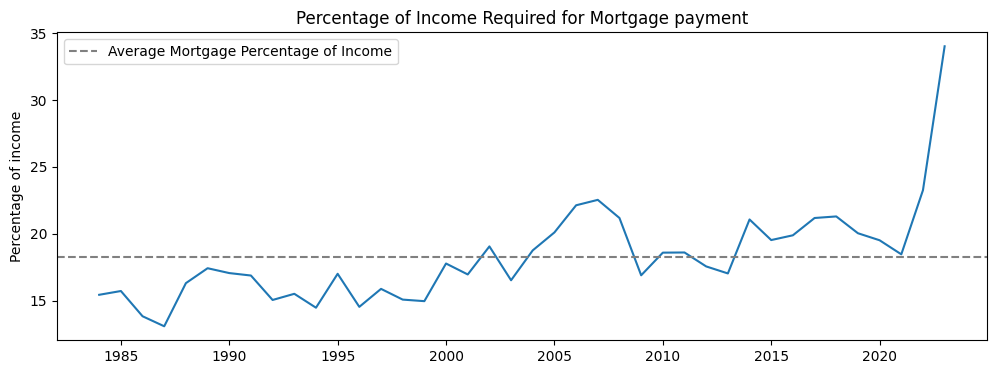

In [59]:
merged_df = pd.merge_asof(
    pd.merge_asof(
        median_household_income.sort_values('date'),
        median_house_price.sort_values('date'),
        on='date',
        direction='backward',
        suffixes=('_income', '_house')
    ),
    avg_mortgage_rates.sort_values('date'),
    on='date',
    direction='backward'
)

# Calculate monthly mortgage payment for each row using the corresponding mortgage rate
merged_df['monthly_mortgage_payment'] = merged_df.apply(
    lambda row: calculate_mortgage_payment(row['value_house'], down_payment_percent, loan_term_years, row['value']),
    axis=1
)
merged_df['monthly_income'] = merged_df['value_income'] / 12
merged_df['mortgage_percent_of_income'] = (merged_df['monthly_mortgage_payment'] / merged_df['monthly_income']) * 100

result = merged_df[['date', 'mortgage_percent_of_income']]
plt.plot(result.date, result.mortgage_percent_of_income)

plt.axhline(y=result.mortgage_percent_of_income.mean(), 
            color='gray', 
            linestyle='--', 
            label=f'Average Mortgage Percentage of Income')


plt.title('Percentage of Income Required for Mortgage payment')
plt.ylabel('Percentage of income')
plt.legend()
plt.show()

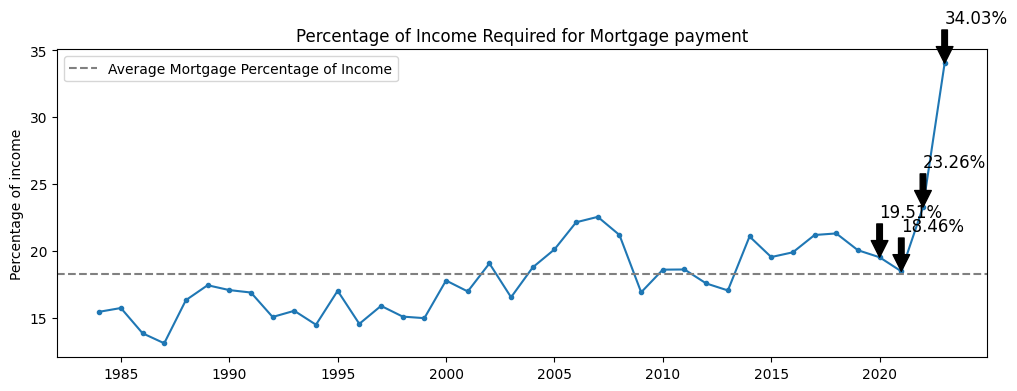

In [60]:
merged_df = pd.merge_asof(
    pd.merge_asof(
        median_household_income.sort_values('date'),
        median_house_price.sort_values('date'),
        on='date',
        direction='backward',
        suffixes=('_income', '_house')
    ),
    avg_mortgage_rates.sort_values('date'),
    on='date',
    direction='backward'
)

# Calculate monthly mortgage payment for each row using the corresponding mortgage rate
merged_df['monthly_mortgage_payment'] = merged_df.apply(
    lambda row: calculate_mortgage_payment(row['value_house'], down_payment_percent, loan_term_years, row['value']),
    axis=1
)
merged_df['monthly_income'] = merged_df['value_income'] / 12
merged_df['mortgage_percent_of_income'] = (merged_df['monthly_mortgage_payment'] / merged_df['monthly_income']) * 100

result = merged_df[['date', 'mortgage_percent_of_income']]
plt.plot(result.date, result.mortgage_percent_of_income, marker='.')

plt.axhline(y=result.mortgage_percent_of_income.mean(), 
            color='gray', 
            linestyle='--', 
            label=f'Average Mortgage Percentage of Income')

# Add markers with text for the last 5 datapoints
last_rows = result.tail(4)
for index, row in last_rows.iterrows():
    plt.annotate(f'{row.mortgage_percent_of_income:.2f}%', 
                 xy=(row.date, row.mortgage_percent_of_income), 
                 xytext=(row.date, row.mortgage_percent_of_income + 3),
                 arrowprops=dict(facecolor='black'),
                 fontsize=12)


plt.title('Percentage of Income Required for Mortgage payment')
plt.ylabel('Percentage of income')
plt.legend()
plt.show()

The median projection for the federal funds rate at the end of 2025 is 3.75% to 4% [(source)](https://www.barrons.com/livecoverage/fed-fomc-meeting-rate-decision-powell-speech-today/card/fed-officials-increase-forecasts-for-level-of-rates-in-2025-2026-UkWWAkV496Sxmqwlt6CN).

Could also look at incomes increasing

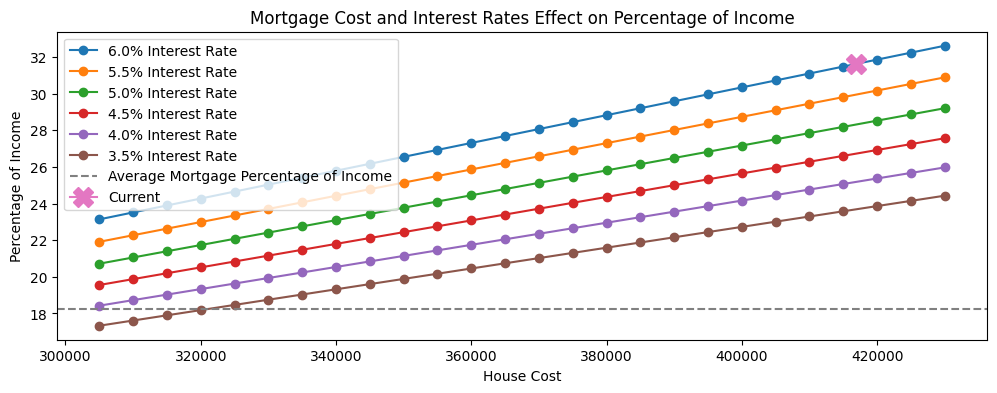

In [61]:
home_price = median_house_price.iloc[-1].value
down_payment_percent = 15
loan_term_years = 30
income = median_household_income.iloc[-1].value / 12
interest_rate = 4.5

for interest_rate in np.arange(6, 3.0, -0.5):
    home_prices = []
    percentages = []
    for home_price in np.arange(430000, 300000, -5000):
        percent = calculate_mortgage_payment(home_price, down_payment_percent, loan_term_years, interest_rate) / income * 100
        home_prices.append(home_price)
        percentages.append(percent)
    plt.plot(home_prices, percentages, marker='o', linestyle='-', label=f'{interest_rate}% Interest Rate')

plt.axhline(y=result.mortgage_percent_of_income.mean(), 
            color='gray', 
            linestyle='--', 
            label=f'Average Mortgage Percentage of Income')


plt.plot(median_house_price.iloc[-1].value, 
         current_monthly_percentage, 
         marker='X', 
         linestyle='-',
         markersize=15,
         label='Current')
plt.xlabel('House Cost')
plt.ylabel('Percentage of Income')
plt.title('Mortgage Cost and Interest Rates Effect on Percentage of Income')
plt.legend()
plt.show()

### Housing Inventory: Median Days on Market in the United States (MEDDAYONMARUS)	
https://fred.stlouisfed.org/series/MEDDAYONMARUS

/var/folders/tl/00b3nkg57wz5g7fsvwlb_76m0000gn/T/ipykernel_44194/136745341.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


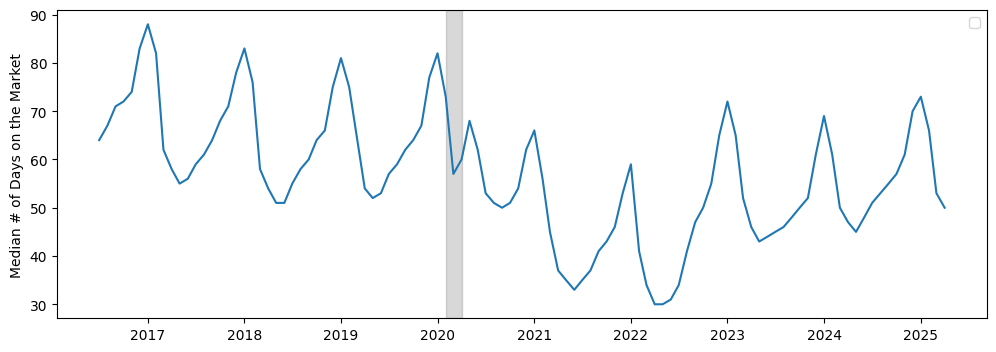

In [62]:
median_days_on_market = datasets.load_median_days_on_market()
plt.plot(median_days_on_market.date, median_days_on_market.value)
plot_recessions(median_days_on_market)
plt.ylabel('Median # of Days on the Market')
plt.legend()
plt.show()


### Housing Inventory: New Listing Count in the United States (NEWLISCOUUS)	
https://fred.stlouisfed.org/series/NEWLISCOUUS

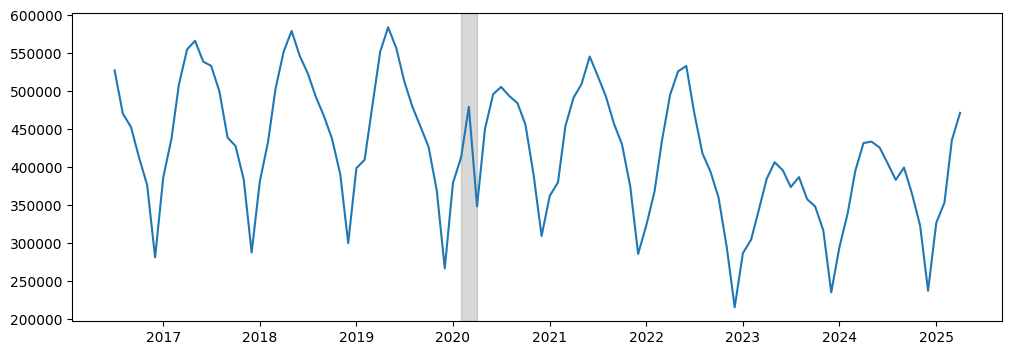

In [63]:
new_listings = datasets.load_new_listings()
plt.plot(new_listings.date, new_listings.value)
plot_recessions(new_listings)

### Housing Inventory: Active Listing Count in the United States (ACTLISCOUUS)	
https://fred.stlouisfed.org/series/ACTLISCOUUS

Latest date: 2025-04-01


[]

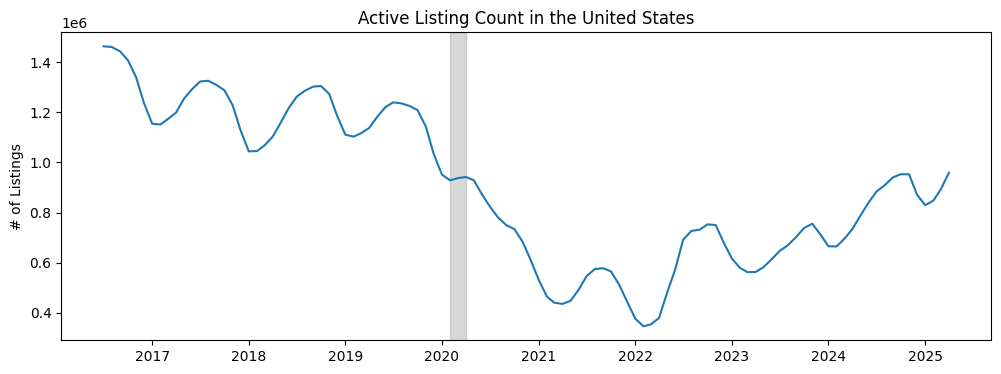

In [88]:
active_listings = datasets.load_active_listings()

latest_date = active_listings.iloc[-1]['date'].strftime('%Y-%m-%d')
print(f"Latest date: {latest_date}")

plt.plot(active_listings.date, active_listings.value)
plot_recessions(active_listings)
plt.title('Active Listing Count in the United States')
plt.ylabel('# of Listings')
plt.plot()

### Housing Affordability Index (Fixed) (FIXHAI)	
https://fred.stlouisfed.org/series/FIXHAI

Value of 100 means that a family with the median income has exactly enough income to qualify for a mortgage on a median-priced home. An index above 100 signifies that family earning the median income has more than enough income to qualify for a mortgage loan on a median-priced home, assuming a 20 percent down payment. This index is calculated for fixed mortgages.

``Removed since we only have data for 2023-2024``

### S&P CoreLogic Case-Shiller U.S. National Home Price Index (CSUSHPINSA)	
https://fred.stlouisfed.org/series/CSUSHPINSA

One of the most widely recognized measures of U.S. residential real estate prices. It tracks the sale price of the same property over time to measure the price change to reduce issues like home upgrades or quality differences between properties.

The index is calculated monthly, with a two-month lag. For example, an index released in September would reflect home prices as of July. It uses a three-month moving average to smooth out short-term fluctuations.

Latest date: 2025-02-01


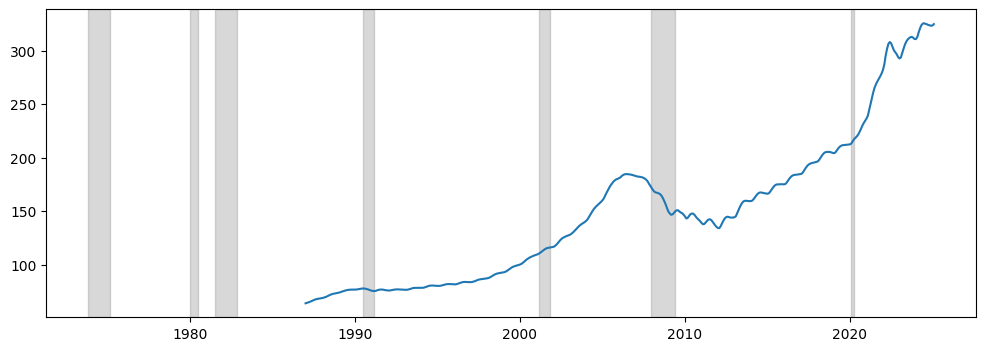

In [89]:
case_shiller = datasets.load_case_shiller()

latest_date = case_shiller.iloc[-1]['date'].strftime('%Y-%m-%d')
print(f"Latest date: {latest_date}")

plt.plot(case_shiller.date, case_shiller.value)
plot_recessions(case_shiller)

https://fredblog.stlouisfed.org/2023/07/are-home-prices-decreasing/

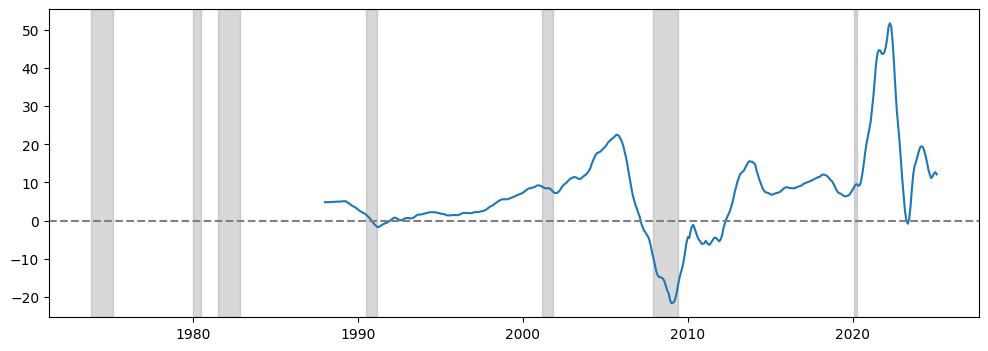

In [66]:
case_shiller['value_last_year'] = case_shiller['value'].shift(12)
case_shiller['year_over_year_change'] = case_shiller['value'] - case_shiller['value_last_year']

plt.plot(case_shiller.date, case_shiller.year_over_year_change)
plot_recessions(case_shiller)
plt.axhline(y=0, color='gray', linestyle='--')

### Monthly Supply of New Houses in the United States (MSACSR)	
https://fred.stlouisfed.org/graph/?graph_id=1366633

Latest date: 2025-03-01


[]

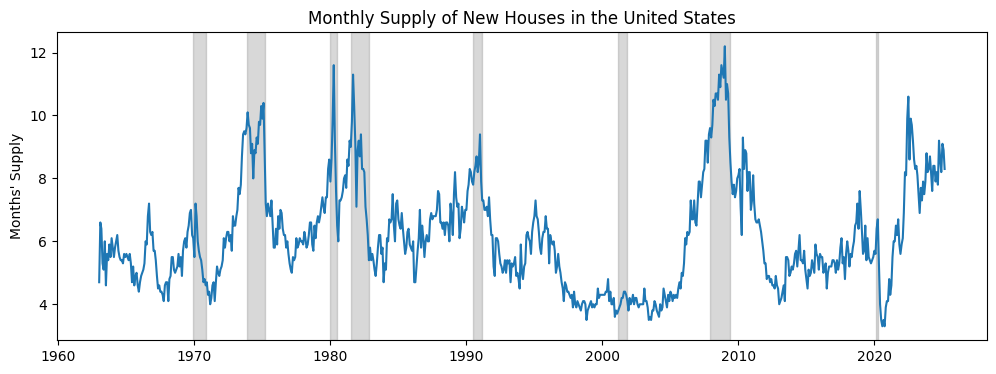

In [90]:
new_house_supply = datasets.load_new_house_supply()

latest_date = new_house_supply.iloc[-1]['date'].strftime('%Y-%m-%d')
print(f"Latest date: {latest_date}")

plt.plot(new_house_supply.date, new_house_supply.value)
plot_recessions(new_house_supply)
plt.title('Monthly Supply of New Houses in the United States')
plt.ylabel("Months' Supply")
plt.plot()

### New Privately-Owned Housing Units Started: Total Units (HOUST)	
https://fred.stlouisfed.org/series/HOUST

Latest date: 2025-04-01


[]

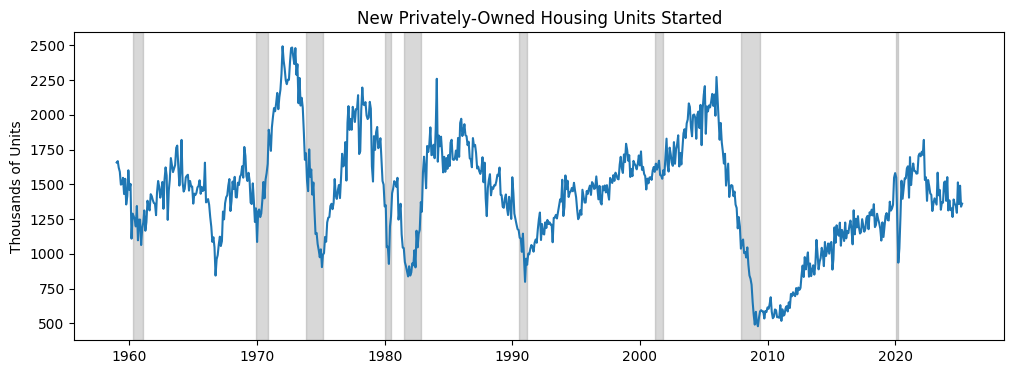

In [91]:
new_house_started = datasets.load_new_house_started()

latest_date = new_house_started.iloc[-1]['date'].strftime('%Y-%m-%d')
print(f"Latest date: {latest_date}")

plt.plot(new_house_started.date, new_house_started.value)
plot_recessions(new_house_started)
plt.title('New Privately-Owned Housing Units Started')
plt.ylabel('Thousands of Units')
plt.plot()

### United States Existing Home Sales
https://tradingeconomics.com/united-states/existing-home-sales

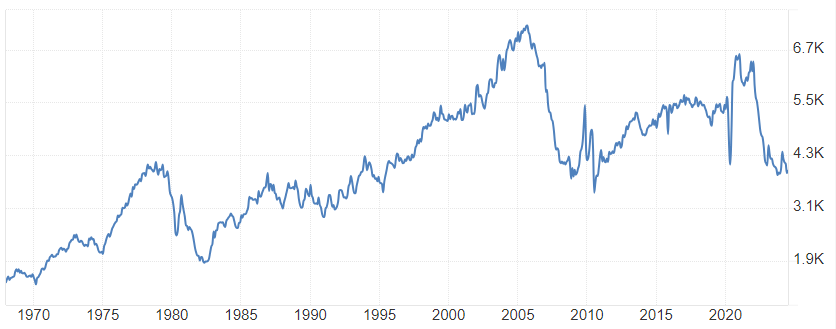

### Land Appreciation
https://www.fhfa.gov/blog/statistics/land-price-appreciation-during-the-covid-19-pandemic#:~:text=The%20red%20bars%20in%20the,most%20of%20the%20county%20bins.

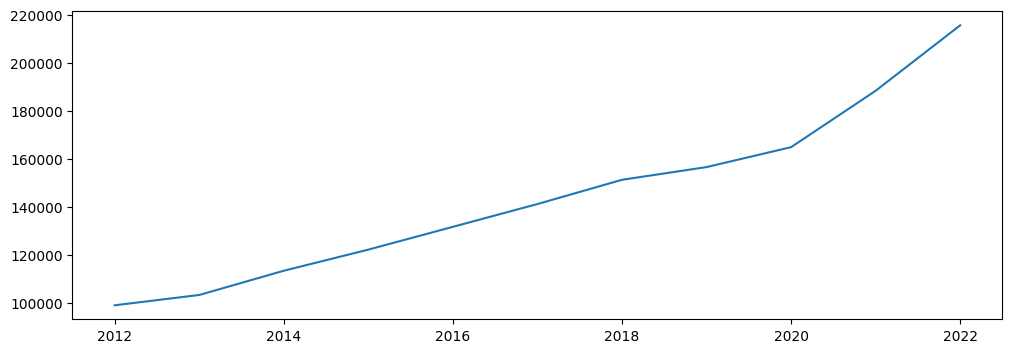

In [69]:
land_values = pd.read_excel('../data/Land_Prices_2024_20_June.xlsx', sheet_name='Panel Nation', header=1)
land_values.rename(columns={'Year': 'date',
                            'Land Value\n(1/4 Acre Lot, Standardized)': 'standardized_land_value'}, 
                    inplace=True)
plt.plot(land_values.date, land_values.standardized_land_value)